# Model Development
This notebook handles:
1. Model Training
2. Model Evaluation
3. Model Comparison

In [116]:
import pandas as pd

import utils.model_development as md

X_train, X_test, y_train, y_test = md.load_split_datasets()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21797, 36), (5450, 36), (21797,), (5450,))

## Model Training and Evaluation

In [117]:
evaluation = pd.DataFrame(columns=["mae", "mse", "rmse", "r2", "mape"])
evaluation.index.name = "Model"

### Linear Regression

In [118]:
from sklearn.linear_model import LinearRegression

md.train_model(X_train, X_test, y_train, y_test, LinearRegression(n_jobs=-1), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,272905.762985,192136418851.996948,438333.684368,0.550358,0.289435


### Ridge Regression

In [119]:
from sklearn.linear_model import Ridge

md.train_model(X_train, X_test, y_train, y_test, Ridge(random_state=42), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,272905.762985,192136418851.996948,438333.684368,0.550358,0.289435
Ridge,272902.623572,192140028387.840149,438337.801687,0.550349,0.289407


### ElasticNet Regression

In [120]:
from sklearn.linear_model import ElasticNet

md.train_model(X_train, X_test, y_train, y_test, ElasticNet(alpha=0.1), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,272905.762985,192136418851.996948,438333.684368,0.550358,0.289435
Ridge,272902.623572,192140028387.840149,438337.801687,0.550349,0.289407
ElasticNet,271504.451304,196379811432.297394,443147.618105,0.540427,0.282236


### Support Vector Regression (SVR)

In [121]:
from sklearn.svm import SVR

md.train_model(X_train, X_test, y_train, y_test, SVR(kernel="linear"), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,272905.762985,192136418851.996948,438333.684368,0.550358,0.289435
Ridge,272902.623572,192140028387.840149,438337.801687,0.550349,0.289407
ElasticNet,271504.451304,196379811432.297394,443147.618105,0.540427,0.282236
SVR,406144.434228,428789873771.28302,654820.489731,-0.003464,0.388304


### Decision Tree Regression

In [122]:
from sklearn.tree import DecisionTreeRegressor

md.train_model(X_train, X_test, y_train, y_test, DecisionTreeRegressor(), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,272905.762985,192136418851.996948,438333.684368,0.550358,0.289435
Ridge,272902.623572,192140028387.840149,438337.801687,0.550349,0.289407
ElasticNet,271504.451304,196379811432.297394,443147.618105,0.540427,0.282236
SVR,406144.434228,428789873771.28302,654820.489731,-0.003464,0.388304
DecisionTreeRegressor,232406.455046,175138815741.845123,418495.896924,0.590136,0.214186


### Random Forest Regression

In [123]:
from sklearn.ensemble import RandomForestRegressor

md.train_model(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state=42, n_jobs=-1),
               evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,272905.762985,192136418851.996948,438333.684368,0.550358,0.289435
Ridge,272902.623572,192140028387.840149,438337.801687,0.550349,0.289407
ElasticNet,271504.451304,196379811432.297394,443147.618105,0.540427,0.282236
SVR,406144.434228,428789873771.28302,654820.489731,-0.003464,0.388304
DecisionTreeRegressor,232406.455046,175138815741.845123,418495.896924,0.590136,0.214186
RandomForestRegressor,170012.897366,95298301578.597061,308704.229933,0.776981,0.159316


### Gradient Boosting Regression

In [124]:
from sklearn.ensemble import GradientBoostingRegressor

md.train_model(X_train, X_test, y_train, y_test, GradientBoostingRegressor(learning_rate=0.2, random_state=42),
               evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,272905.762985,192136418851.996948,438333.684368,0.550358,0.289435
Ridge,272902.623572,192140028387.840149,438337.801687,0.550349,0.289407
ElasticNet,271504.451304,196379811432.297394,443147.618105,0.540427,0.282236
SVR,406144.434228,428789873771.28302,654820.489731,-0.003464,0.388304
DecisionTreeRegressor,232406.455046,175138815741.845123,418495.896924,0.590136,0.214186
RandomForestRegressor,170012.897366,95298301578.597061,308704.229933,0.776981,0.159316
GradientBoostingRegressor,182006.501028,102202198546.064148,319690.785832,0.760824,0.173901


### K-Nearest Neighbors Regression

In [125]:
from sklearn.neighbors import KNeighborsRegressor

md.train_model(X_train, X_test, y_train, y_test,
               KNeighborsRegressor(n_neighbors=9, weights="distance", metric="manhattan", n_jobs=-1),
               evaluation=evaluation,
               save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,272905.762985,192136418851.996948,438333.684368,0.550358,0.289435
Ridge,272902.623572,192140028387.840149,438337.801687,0.550349,0.289407
ElasticNet,271504.451304,196379811432.297394,443147.618105,0.540427,0.282236
SVR,406144.434228,428789873771.28302,654820.489731,-0.003464,0.388304
DecisionTreeRegressor,232406.455046,175138815741.845123,418495.896924,0.590136,0.214186
RandomForestRegressor,170012.897366,95298301578.597061,308704.229933,0.776981,0.159316
GradientBoostingRegressor,182006.501028,102202198546.064148,319690.785832,0.760824,0.173901
KNeighborsRegressor,376939.158967,335732738294.442322,579424.488863,0.214311,0.417282


### Bayesian Regression

In [126]:
from sklearn.linear_model import BayesianRidge

md.train_model(X_train, X_test, y_train, y_test, BayesianRidge(), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,272905.762985,192136418851.996948,438333.684368,0.550358,0.289435
Ridge,272902.623572,192140028387.840149,438337.801687,0.550349,0.289407
ElasticNet,271504.451304,196379811432.297394,443147.618105,0.540427,0.282236
SVR,406144.434228,428789873771.28302,654820.489731,-0.003464,0.388304
DecisionTreeRegressor,232406.455046,175138815741.845123,418495.896924,0.590136,0.214186
RandomForestRegressor,170012.897366,95298301578.597061,308704.229933,0.776981,0.159316
GradientBoostingRegressor,182006.501028,102202198546.064148,319690.785832,0.760824,0.173901
KNeighborsRegressor,376939.158967,335732738294.442322,579424.488863,0.214311,0.417282
BayesianRidge,272983.422333,192231160532.168793,438441.741321,0.550136,0.289446


### ARD Regression

In [127]:
from sklearn.linear_model import ARDRegression

md.train_model(X_train, X_test, y_train, y_test, ARDRegression(), evaluation=evaluation, save=True)

,mae,mse,rmse,r2,mape
Model,,,,,
LinearRegression,272905.762985,192136418851.996948,438333.684368,0.550358,0.289435
Ridge,272902.623572,192140028387.840149,438337.801687,0.550349,0.289407
ElasticNet,271504.451304,196379811432.297394,443147.618105,0.540427,0.282236
SVR,406144.434228,428789873771.28302,654820.489731,-0.003464,0.388304
DecisionTreeRegressor,232406.455046,175138815741.845123,418495.896924,0.590136,0.214186
RandomForestRegressor,170012.897366,95298301578.597061,308704.229933,0.776981,0.159316
GradientBoostingRegressor,182006.501028,102202198546.064148,319690.785832,0.760824,0.173901
KNeighborsRegressor,376939.158967,335732738294.442322,579424.488863,0.214311,0.417282
BayesianRidge,272983.422333,192231160532.168793,438441.741321,0.550136,0.289446


## Model Comparison

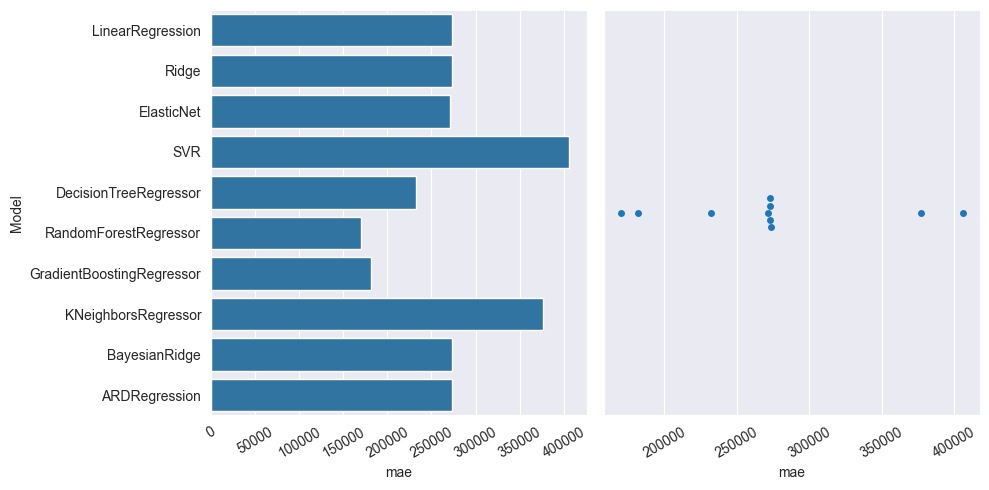

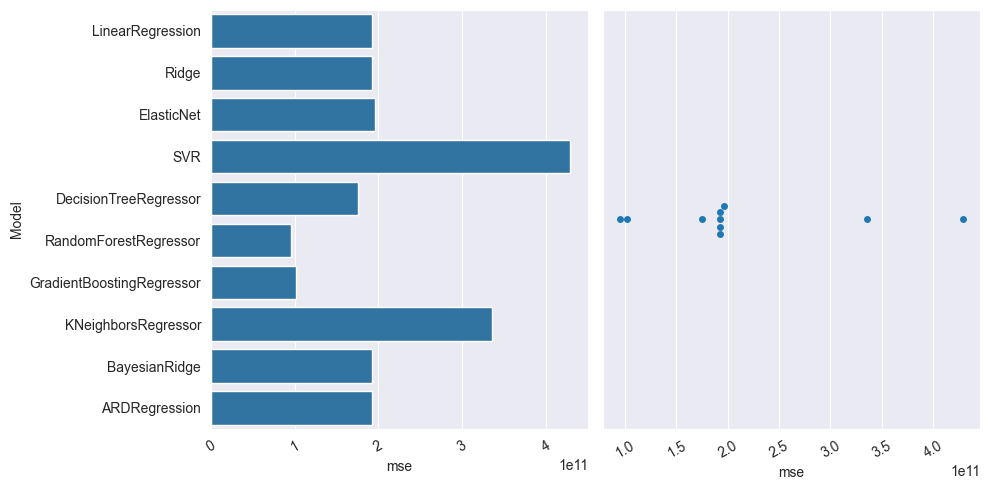

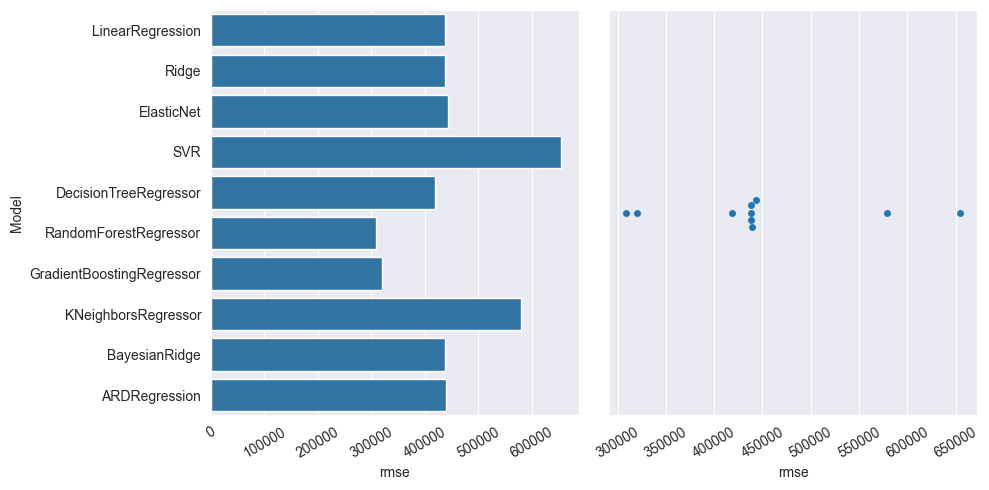

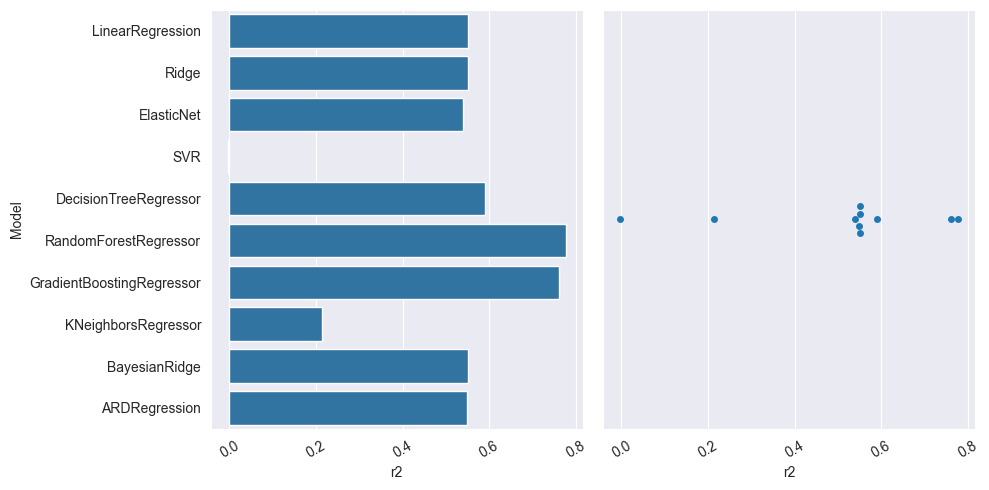

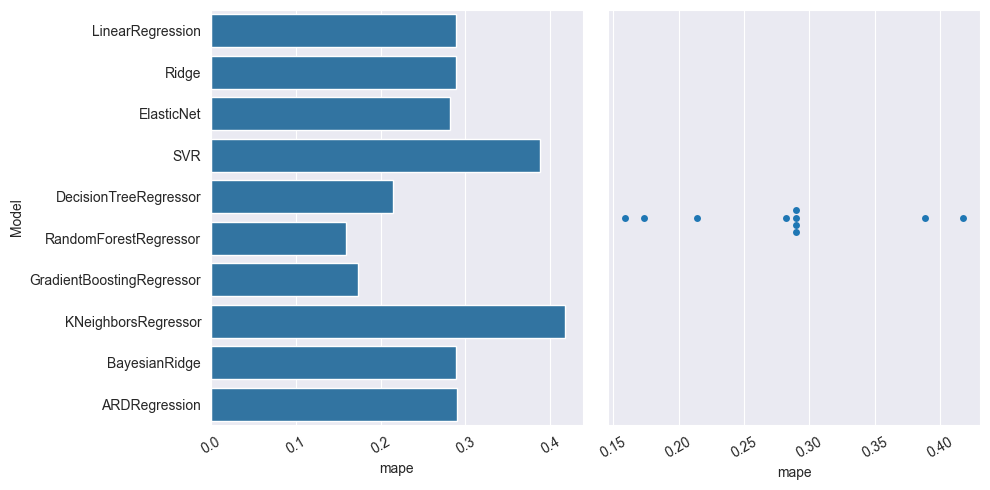

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in evaluation.columns:
    _, axes = plt.subplots(1, 2, figsize=(10, 5))
    sns.barplot(data=evaluation, x=column, y=evaluation.index, ax=axes[0])
    axes[0].tick_params(axis="x", labelrotation=30)
    sns.swarmplot(data=evaluation, x=column, ax=axes[1])
    axes[1].tick_params(axis="x", labelrotation=30)
    plt.tight_layout()
    plt.show()

In [129]:
eval_long = evaluation.reset_index().melt(id_vars="Model", value_vars=["mae", "rmse", "r2", "mape", "mse"],
                                          var_name="Metric", value_name="Score")
eval_long.head()

,Model,Metric,Score
0,LinearRegression,mae,272905.762985
1,Ridge,mae,272902.623572
2,ElasticNet,mae,271504.451304
3,SVR,mae,406144.434228
4,DecisionTreeRegressor,mae,232406.455046


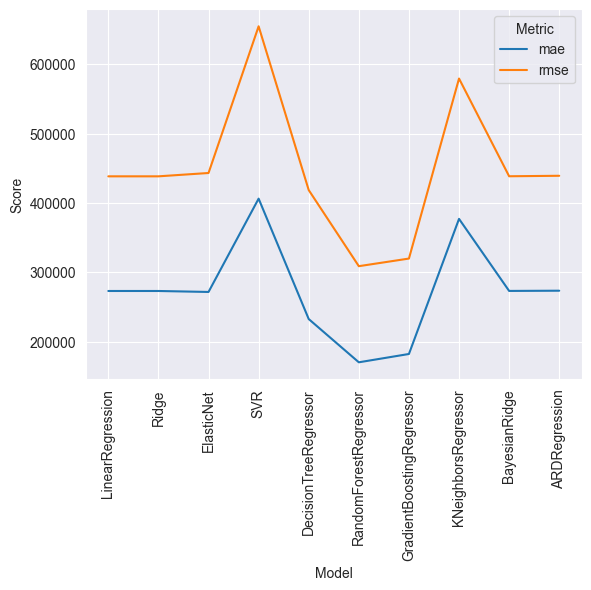

In [130]:
sns.lineplot(data=eval_long[eval_long["Metric"].isin(["mae", "rmse"])], x="Model", y="Score", hue="Metric")
plt.xticks(rotation=90)
plt.show()

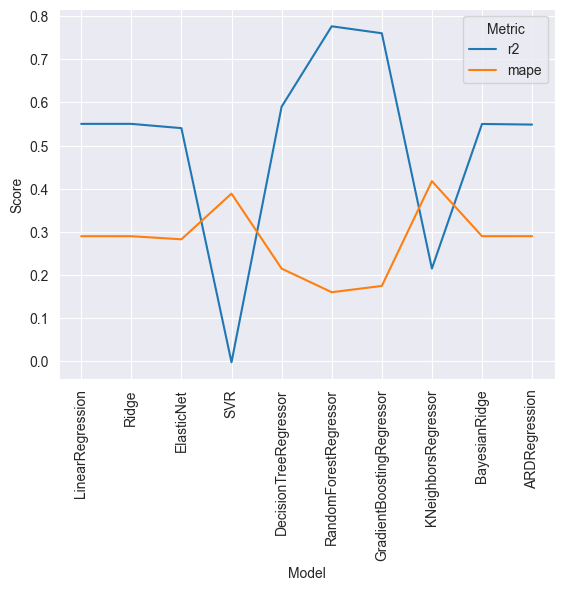

In [131]:
sns.lineplot(data=eval_long[eval_long["Metric"].isin(["r2", "mape"])], x="Model", y="Score", hue="Metric")
plt.xticks(rotation=90)
plt.show()

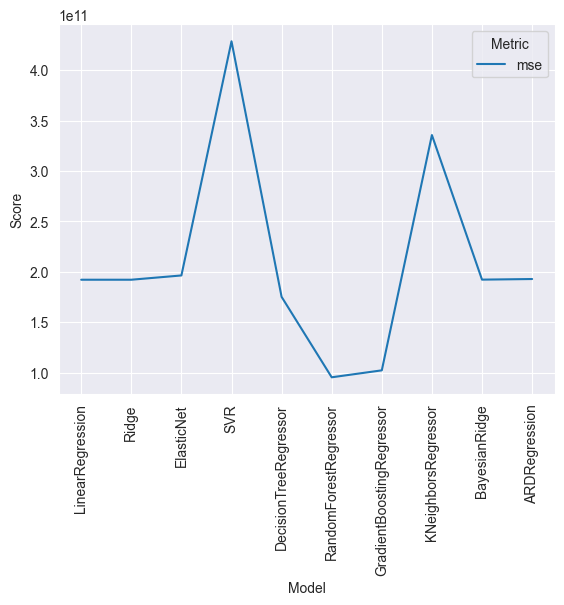

In [132]:
sns.lineplot(data=eval_long[eval_long["Metric"].isin(["mse"])], x="Model", y="Score", hue="Metric")
plt.xticks(rotation=90)
plt.show()